HYPERPARAMETER TUNING
Dataset : Train (800, 10), Test (200, 10)

1. MODÈLE DE BASE
Modèle de base (paramètres par défaut) :
   Train accuracy : 1.000
   Test accuracy  : 0.950
   Gap            : 0.050

Paramètres par défaut :
   n_estimators: 100
   max_depth: None
   min_samples_split: 2
   min_samples_leaf: 1
   max_features: sqrt

2. GRID SEARCH
Grille de paramètres :
   n_estimators: [50, 100, 200]
   max_depth: [5, 10, 15, None]
   min_samples_split: [2, 5, 10]
   min_samples_leaf: [1, 2, 4]

Nombre total de combinaisons : 108
Lancement du Grid Search (cela peut prendre du temps)...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Grid Search terminé en 40.9 secondes

Meilleurs paramètres (Grid Search) :
   max_depth: 15
   min_samples_leaf: 1
   min_samples_split: 10
   n_estimators: 50
   Score CV : 0.939

Performances sur test set :
   Train accuracy : 0.986
   Test accuracy  : 0.940
   Gap            : 0.046

3. RANDOM SEARCH
Distributions de paramètres :
   n_e

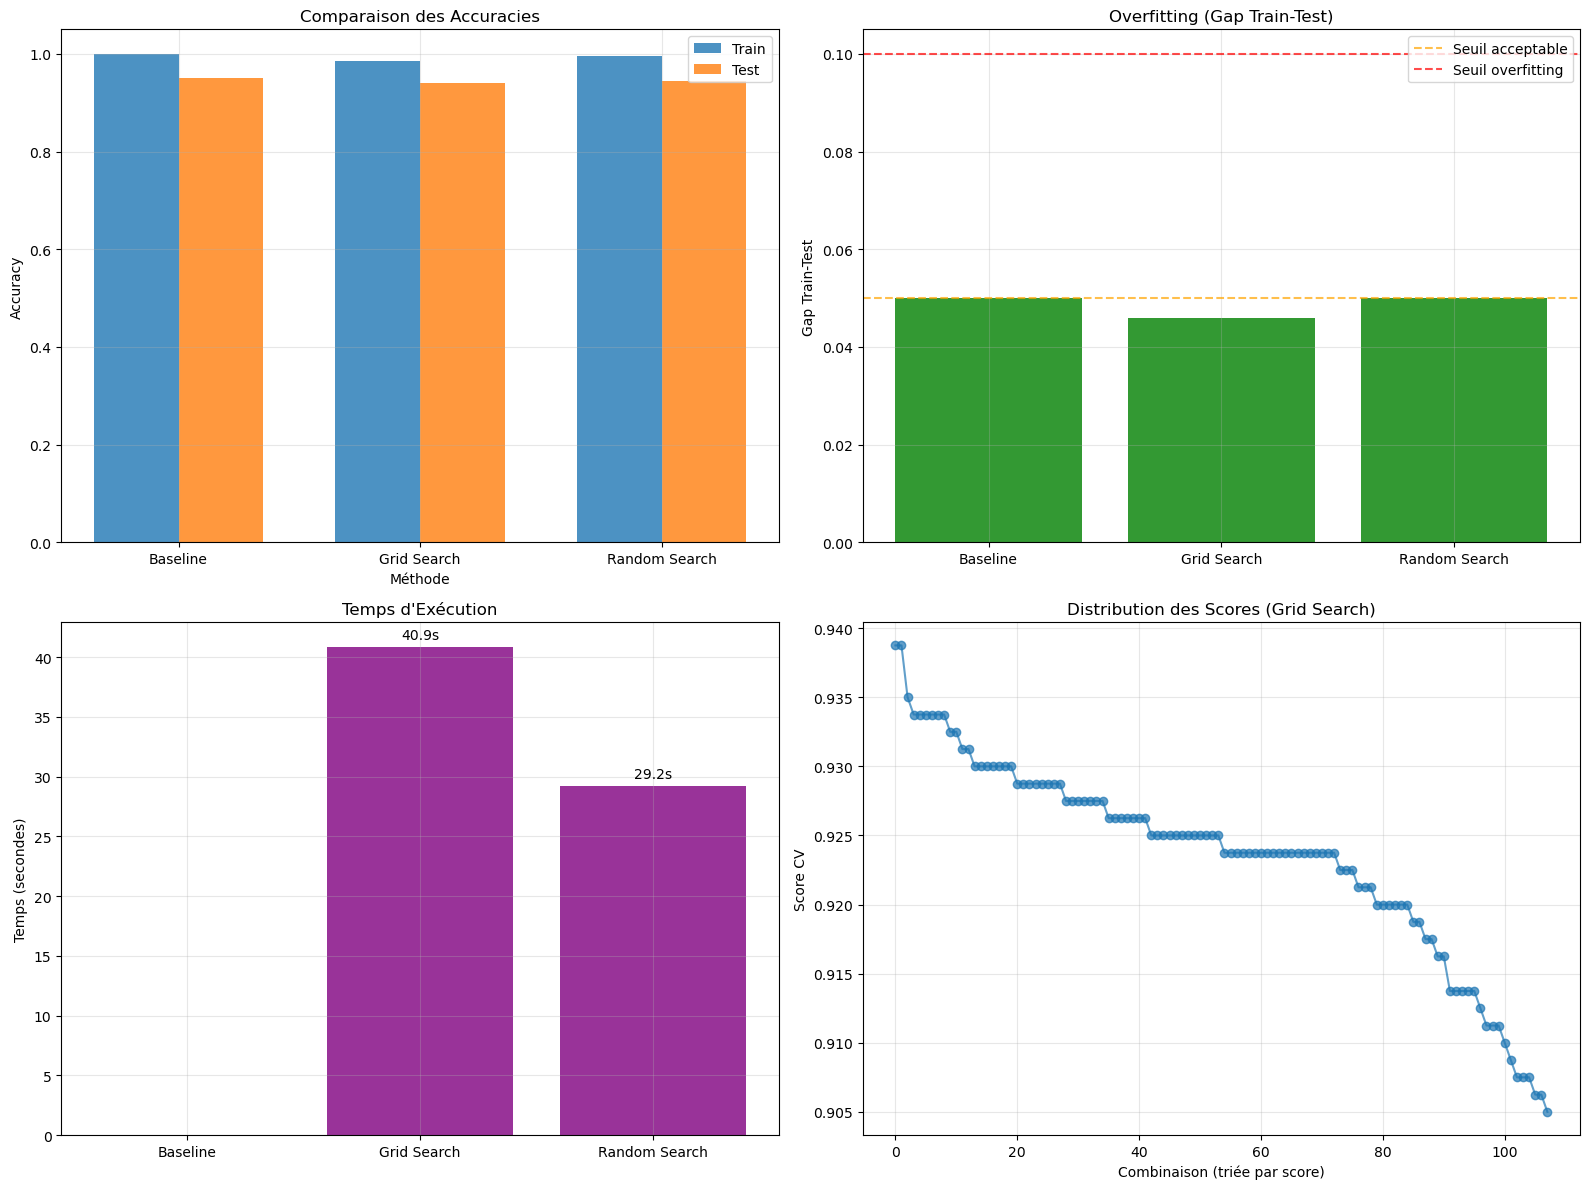


6. ANALYSE DES PARAMÈTRES
Impact des paramètres (Grid Search) :

n_estimators :
   50: 0.928 ± 0.006
   100: 0.922 ± 0.006
   200: 0.921 ± 0.007

max_depth :
   5: 0.913 ± 0.005
   10: 0.926 ± 0.004
   15: 0.927 ± 0.004

min_samples_split :
   2: 0.924 ± 0.006
   5: 0.923 ± 0.006
   10: 0.923 ± 0.009

7. RECOMMANDATIONS
Meilleure méthode : Random Search
Amélioration : +-0.005 (-0.5%)

RECOMMANDATIONS HYPERPARAMETER TUNING :

EFFICACITÉ :
   • Random Search souvent plus efficace que Grid Search
   • Commencer par Random Search avec beaucoup d'itérations
   • Affiner avec Grid Search sur une zone restreinte

PARAMÈTRES CLÉS :
   • n_estimators : Plus = mieux (mais + lent)
   • max_depth : Contrôle l'overfitting
   • min_samples_split/leaf : Régularisation
   • max_features : Impact sur diversité

VALIDATION :
   • Toujours utiliser validation croisée
   • Surveiller le gap train/test
   • Tester sur un vrai test set à la fin

OPTIMISATION :
   • Utiliser n_jobs=-1 pour parallélisation
 

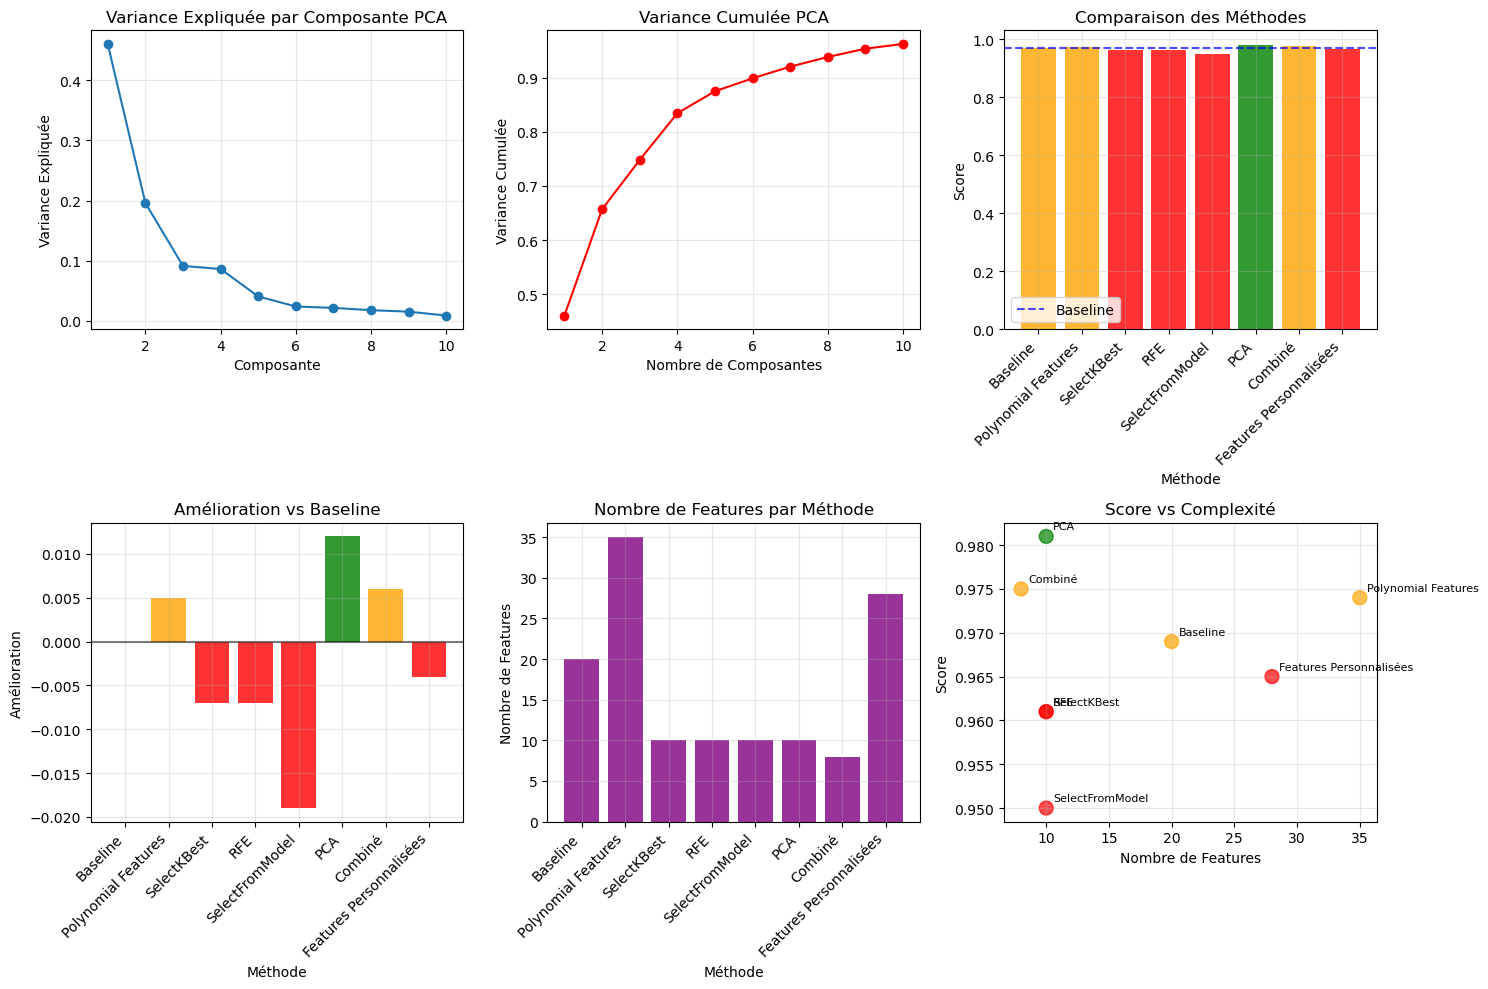


7. RECOMMANDATIONS
Meilleure méthode : PCA
Score : 0.981
Amélioration : +0.012
Features : 10

RECOMMANDATIONS FEATURE ENGINEERING :

SÉLECTION :
   • SelectKBest : Rapide, bon point de départ
   • RFE : Plus précis mais plus lent
   • SelectFromModel : Importance du modèle

RÉDUCTION :
   • PCA : Perd l'interprétabilité mais efficace
   • Combiné : Sélection puis réduction souvent optimal

CRÉATION :
   • Features métier
   • Ratios et interactions
   • Statistiques par échantillon : mean, std, min, max

ÉQUILIBRE :
   • Plus de features ≠ toujours mieux
   • Surveiller l'overfitting
   • Valider sur test set indépendant


Feature Engineering avancé terminé !
ENSEMBLE METHODS
Dataset : Train (800, 10), Test (200, 10)

1. MODÈLES INDIVIDUELS
   Random Forest        : CV 0.929 ± 0.017, Test 0.950
   Gradient Boosting    : CV 0.919 ± 0.017, Test 0.940
   Logistic Regression  : CV 0.809 ± 0.030, Test 0.855
   SVM                  : CV 0.907 ± 0.024, Test 0.910
   Decision Tree        : CV

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [1]:
# Hyperparameter Tuning avec Grid Search et Random Search
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import (
    train_test_split, GridSearchCV, RandomizedSearchCV, 
    cross_val_score, StratifiedKFold
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import time

print("HYPERPARAMETER TUNING")
print("=" * 25)
#----------------------------------------------
# Créer un dataset
#----------------------------------------------
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Dataset : Train {X_train.shape}, Test {X_test.shape}")
#----------------------------------------------
# 1. MODÈLE DE BASE (SANS TUNING)
#----------------------------------------------
print(f"\n1. MODÈLE DE BASE")
#----------------------------------------------
# Modèle avec paramètres par défaut
#----------------------------------------------
base_model = RandomForestClassifier(random_state=42)
base_model.fit(X_train, y_train)

base_train_score = base_model.score(X_train, y_train)
base_test_score = base_model.score(X_test, y_test)

print("Modèle de base (paramètres par défaut) :")
print(f"   Train accuracy : {base_train_score:.3f}")
print(f"   Test accuracy  : {base_test_score:.3f}")
print(f"   Gap            : {base_train_score - base_test_score:.3f}")
#----------------------------------------------
# Afficher paramètres par défaut
#----------------------------------------------
print("\nParamètres par défaut :")
default_params = base_model.get_params()
key_params = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features']
for param in key_params:
    print(f"   {param}: {default_params.get(param, 'N/A')}")
#----------------------------------------------
# 2. GRID SEARCH
#----------------------------------------------

print(f"\n2. GRID SEARCH")
#----------------------------------------------
# Définir la grille de paramètres
#----------------------------------------------
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Grille de paramètres :")
for param, values in param_grid.items():
    print(f"   {param}: {values}")

total_combinations = np.prod([len(values) for values in param_grid.values()])
print(f"\nNombre total de combinaisons : {total_combinations}")
#----------------------------------------------
# Grid Search avec validation croisée
#----------------------------------------------
print("Lancement du Grid Search (cela peut prendre du temps)...")
start_time = time.time()

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Utiliser tous les processeurs
    verbose=1   # Afficher le progrès
)

grid_search.fit(X_train, y_train)
grid_time = time.time() - start_time

print(f"Grid Search terminé en {grid_time:.1f} secondes")

# Meilleurs paramètres
best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_

print("\nMeilleurs paramètres (Grid Search) :")
for param, value in best_params_grid.items():
    print(f"   {param}: {value}")
print(f"   Score CV : {best_score_grid:.3f}")

# Évaluer sur le test set
best_model_grid = grid_search.best_estimator_
grid_test_score = best_model_grid.score(X_test, y_test)
grid_train_score = best_model_grid.score(X_train, y_train)

print("\nPerformances sur test set :")
print(f"   Train accuracy : {grid_train_score:.3f}")
print(f"   Test accuracy  : {grid_test_score:.3f}")
print(f"   Gap            : {grid_train_score - grid_test_score:.3f}")

#----------------------------------------------
# 3. RANDOM SEARCH (PLUS EFFICACE)
#----------------------------------------------

print(f"\n3. RANDOM SEARCH")

# Définir des distributions pour Random Search
param_dist = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [3, 5, 7, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['sqrt', 'log2', None, 0.5, 0.8]
}

print("Distributions de paramètres :")
for param, values in param_dist.items():
    print(f"   {param}: {len(values)} valeurs")

# Random Search
n_iter = 50  # Nombre d'itérations (combinaisons à tester)
print(f"\nRandom Search avec {n_iter} itérations...")

start_time = time.time()

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_dist,
    n_iter=n_iter,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(X_train, y_train)
random_time = time.time() - start_time

print(f"Random Search terminé en {random_time:.1f} secondes")

# Meilleurs paramètres
best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print("\nMeilleurs paramètres (Random Search) :")
for param, value in best_params_random.items():
    print(f"   {param}: {value}")
print(f"   Score CV : {best_score_random:.3f}")

# Évaluer sur le test set
best_model_random = random_search.best_estimator_
random_test_score = best_model_random.score(X_test, y_test)
random_train_score = best_model_random.score(X_train, y_train)

print("\nPerformances sur test set :")
print(f"   Train accuracy : {random_train_score:.3f}")
print(f"   Test accuracy  : {random_test_score:.3f}")
print(f"   Gap            : {random_train_score - random_test_score:.3f}")
#----------------------------------------------
# 4. COMPARAISON DES MÉTHODES
#----------------------------------------------

print(f"\n4. COMPARAISON DES MÉTHODES")

comparison_data = {
    'Méthode': ['Baseline', 'Grid Search', 'Random Search'],
    'Train Accuracy': [base_train_score, grid_train_score, random_train_score],
    'Test Accuracy': [base_test_score, grid_test_score, random_test_score],
    'Gap': [
        base_train_score - base_test_score,
        grid_train_score - grid_test_score,
        random_train_score - random_test_score
    ],
    'Temps (s)': [0, grid_time, random_time]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.round(3)
print(comparison_df)

# Amélioration par rapport au baseline
grid_improvement = grid_test_score - base_test_score
random_improvement = random_test_score - base_test_score

print("\nAméliorations :")
print(f"   Grid Search    : +{grid_improvement:.3f} ({grid_improvement*100:.1f}%)")
print(f"   Random Search  : +{random_improvement:.3f} ({random_improvement*100:.1f}%)")

# 5. VISUALISATION DES RÉSULTATS
print(f"\n5. VISUALISATION")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Graphique 1 : Comparaison des accuracies
methods = comparison_df['Méthode']
train_scores = comparison_df['Train Accuracy']
test_scores = comparison_df['Test Accuracy']

x = np.arange(len(methods))
width = 0.35

axes[0, 0].bar(x - width/2, train_scores, width, label='Train', alpha=0.8)
axes[0, 0].bar(x + width/2, test_scores, width, label='Test', alpha=0.8)
axes[0, 0].set_xlabel('Méthode')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Comparaison des Accuracies')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(methods)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Graphique 2 : Gap train/test
gaps = comparison_df['Gap']
colors = ['red' if gap > 0.1 else 'orange' if gap > 0.05 else 'green' for gap in gaps]

axes[0, 1].bar(methods, gaps, color=colors, alpha=0.8)
axes[0, 1].set_ylabel('Gap Train-Test')
axes[0, 1].set_title('Overfitting (Gap Train-Test)')
axes[0, 1].axhline(y=0.05, color='orange', linestyle='--', alpha=0.7, label='Seuil acceptable')
axes[0, 1].axhline(y=0.1, color='red', linestyle='--', alpha=0.7, label='Seuil overfitting')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Graphique 3 : Temps d'exécution
times = comparison_df['Temps (s)']
axes[1, 0].bar(methods, times, alpha=0.8, color='purple')
axes[1, 0].set_ylabel('Temps (secondes)')
axes[1, 0].set_title('Temps d\'Exécution')
axes[1, 0].grid(True, alpha=0.3)

for i, v in enumerate(times):
    if v > 0:
        axes[1, 0].text(i, v + max(times)*0.01, f'{v:.1f}s', ha='center', va='bottom')

# Graphique 4 : Évolution des scores Grid Search
if hasattr(grid_search, 'cv_results_'):
    cv_results = pd.DataFrame(grid_search.cv_results_)
    scores = cv_results['mean_test_score']
    
    axes[1, 1].plot(range(len(scores)), sorted(scores, reverse=True), 'o-', alpha=0.7)
    axes[1, 1].set_xlabel('Combinaison (triée par score)')
    axes[1, 1].set_ylabel('Score CV')
    axes[1, 1].set_title('Distribution des Scores (Grid Search)')
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#----------------------------------------------
# 6. ANALYSE DÉTAILLÉE DES PARAMÈTRES
#----------------------------------------------

print(f"\n6. ANALYSE DES PARAMÈTRES")

if hasattr(grid_search, 'cv_results_'):
    cv_results = pd.DataFrame(grid_search.cv_results_)
    print("Impact des paramètres (Grid Search) :")
    for param in ['n_estimators', 'max_depth', 'min_samples_split']:
        param_col = f'param_{param}'
        if param_col in cv_results.columns:
            param_impact = cv_results.groupby(param_col)['mean_test_score'].agg(['mean', 'std'])
            print(f"\n{param} :")
            for value, stats in param_impact.iterrows():
                print(f"   {value}: {stats['mean']:.3f} ± {stats['std']:.3f}")

#----------------------------------------------
# 7. RECOMMANDATIONS
#----------------------------------------------
print(f"\n7. RECOMMANDATIONS")

best_method = 'Grid Search' if grid_test_score > random_test_score else 'Random Search'
best_score = max(grid_test_score, random_test_score)
improvement = best_score - base_test_score

print(f"Meilleure méthode : {best_method}")
print(f"Amélioration : +{improvement:.3f} ({improvement*100:.1f}%)")

recommendations = f"""
RECOMMANDATIONS HYPERPARAMETER TUNING :

EFFICACITÉ :
   • Random Search souvent plus efficace que Grid Search
   • Commencer par Random Search avec beaucoup d'itérations
   • Affiner avec Grid Search sur une zone restreinte

PARAMÈTRES CLÉS :
   • n_estimators : Plus = mieux (mais + lent)
   • max_depth : Contrôle l'overfitting
   • min_samples_split/leaf : Régularisation
   • max_features : Impact sur diversité

VALIDATION :
   • Toujours utiliser validation croisée
   • Surveiller le gap train/test
   • Tester sur un vrai test set à la fin

OPTIMISATION :
   • Utiliser n_jobs=-1 pour parallélisation
   • Commencer par paramètres ayant + d'impact
   • Itérer : grossier puis fin
"""

print(recommendations)
print("\nHyperparameter tuning terminé !")

#----------------------------------------------
# Feature Engineering avancé
#----------------------------------------------

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

print("FEATURE ENGINEERING AVANCÉ")
print("=" * 32)

# Créer un dataset avec plus de features
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_clusters_per_class=1,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Dataset initial : {X_train.shape[1]} features")

# Modèle de référence
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
base_score = cross_val_score(base_model, X_train, y_train, cv=5).mean()
print(f"Score de référence : {base_score:.3f}")

#----------------------------------------------
# 1. FEATURES POLYNOMIALES
#----------------------------------------------
print(f"\n1. FEATURES POLYNOMIALES")

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_poly = poly.fit_transform(X_train[:, :5])  # Seulement sur 5 premières features

print("Features polynomiales :")
print("   Original : 5 features")
print(f"   Polynomial : {X_poly.shape[1]} features")

# Tester l'amélioration
X_train_extended = np.hstack([X_train, X_poly])
X_test_poly = poly.transform(X_test[:, :5])
X_test_extended = np.hstack([X_test, X_test_poly])

poly_score = cross_val_score(base_model, X_train_extended, y_train, cv=5).mean()
improvement_poly = poly_score - base_score

print(f"Score avec features polynomiales : {poly_score:.3f}")
print(f"Amélioration : {improvement_poly:+.3f}")

#----------------------------------------------
# 2. SÉLECTION DE FEATURES
#----------------------------------------------
print(f"\n2. SÉLECTION DE FEATURES")

selector_kbest = SelectKBest(k=10)
X_train_kbest = selector_kbest.fit_transform(X_train, y_train)
X_test_kbest = selector_kbest.transform(X_test)

kbest_score = cross_val_score(base_model, X_train_kbest, y_train, cv=5).mean()
improvement_kbest = kbest_score - base_score

print("SelectKBest (10 meilleures features) :")
print(f"   Score : {kbest_score:.3f}")
print(f"   Amélioration : {improvement_kbest:+.3f}")
selected_features = selector_kbest.get_support()
print(f"   Features sélectionnées : {np.where(selected_features)[0]}")

# Méthode 2 : RFE
rfe = RFE(estimator=RandomForestClassifier(n_estimators=50, random_state=42), n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

rfe_score = cross_val_score(base_model, X_train_rfe, y_train, cv=5).mean()
improvement_rfe = rfe_score - base_score

print("\nRFE (10 meilleures features) :")
print(f"   Score : {rfe_score:.3f}")
print(f"   Amélioration : {improvement_rfe:+.3f}")
print(f"   Features sélectionnées : {np.where(rfe.support_)[0]}")

# Méthode 3 : SelectFromModel (Lasso)
lasso = LassoCV(cv=5, random_state=42)
selector_model = SelectFromModel(lasso)
X_train_model = selector_model.fit_transform(X_train, y_train)
X_test_model = selector_model.transform(X_test)

model_score = cross_val_score(base_model, X_train_model, y_train, cv=5).mean()
improvement_model = model_score - base_score

print("\nSelectFromModel (Lasso) :")
print(f"   Features sélectionnées : {X_train_model.shape[1]}")
print(f"   Score : {model_score:.3f}")
print(f"   Amélioration : {improvement_model:+.3f}")

# 3. RÉDUCTION DE DIMENSIONALITÉ
print(f"\n3. RÉDUCTION DE DIMENSIONALITÉ")

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

pca_score = cross_val_score(base_model, X_train_pca, y_train, cv=5).mean()
improvement_pca = pca_score - base_score

print("PCA (10 composantes) :")
print(f"   Score : {pca_score:.3f}")
print(f"   Amélioration : {improvement_pca:+.3f}")
print(f"   Variance expliquée : {pca.explained_variance_ratio_.sum():.3f}")

# Visualisations
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
plt.plot(range(1, 11), pca.explained_variance_ratio_, 'o-')
plt.xlabel('Composante'); plt.ylabel('Variance Expliquée'); plt.title('Variance Expliquée par Composante PCA'); plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 2)
plt.plot(range(1, 11), np.cumsum(pca.explained_variance_ratio_), 'o-', color='red')
plt.xlabel('Nombre de Composantes'); plt.ylabel('Variance Cumulée'); plt.title('Variance Cumulée PCA'); plt.grid(True, alpha=0.3)

# 4. COMBINAISON
print(f"\n4. COMBINAISON DE TECHNIQUES")

X_train_combined = X_train_kbest
pca_combined = PCA(n_components=8)
X_train_combined = pca_combined.fit_transform(X_train_combined)
X_test_combined = pca_combined.transform(X_test_kbest)

combined_score = cross_val_score(base_model, X_train_combined, y_train, cv=5).mean()
improvement_combined = combined_score - base_score

print("Combiné (SelectKBest + PCA) :")
print(f"   Features finales : {X_train_combined.shape[1]}")
print(f"   Score : {combined_score:.3f}")
print(f"   Amélioration : {improvement_combined:+.3f}")

#----------------------------------------------
# 5. FEATURES PERSONNALISÉES
#----------------------------------------------
print(f"\n5. FEATURES PERSONNALISÉES")

def create_custom_features(X):
    X_custom = X.copy()
    X_custom = np.column_stack([X_custom, X[:, 0] / (X[:, 1] + 1e-8)])
    X_custom = np.column_stack([X_custom, X[:, 2] / (X[:, 3] + 1e-8)])
    X_custom = np.column_stack([X_custom, X[:, 0] + X[:, 1]])
    X_custom = np.column_stack([X_custom, np.abs(X[:, 0] - X[:, 1])])
    X_custom = np.column_stack([X_custom, np.mean(X, axis=1)])
    X_custom = np.column_stack([X_custom, np.std(X, axis=1)])
    X_custom = np.column_stack([X_custom, np.max(X, axis=1)])
    X_custom = np.column_stack([X_custom, np.min(X, axis=1)])
    return X_custom

X_train_custom = create_custom_features(X_train)
X_test_custom = create_custom_features(X_test)

custom_score = cross_val_score(base_model, X_train_custom, y_train, cv=5).mean()
improvement_custom = custom_score - base_score

print("Features personnalisées :")
print(f"   Features ajoutées : {X_train_custom.shape[1] - X_train.shape[1]}")
print(f"   Score : {custom_score:.3f}")
print(f"   Amélioration : {improvement_custom:+.3f}")

#----------------------------------------------
# 6. COMPARAISON
#----------------------------------------------
print(f"\n6. COMPARAISON DE TOUTES LES MÉTHODES")

methods_data = {
    'Méthode': ['Baseline','Polynomial Features','SelectKBest','RFE','SelectFromModel','PCA','Combiné','Features Personnalisées'],
    'Score': [base_score, poly_score, kbest_score, rfe_score, model_score, pca_score, combined_score, custom_score],
    'Amélioration': [0, improvement_poly, improvement_kbest, improvement_rfe, improvement_model, improvement_pca, improvement_combined, improvement_custom],
    'Nb Features': [X_train.shape[1], X_train_extended.shape[1], X_train_kbest.shape[1], X_train_rfe.shape[1], X_train_model.shape[1], X_train_pca.shape[1], X_train_combined.shape[1], X_train_custom.shape[1]]
}
methods_df = pd.DataFrame(methods_data).round(3)
print(methods_df)

plt.subplot(2, 3, 3)
methods = methods_df['Méthode']; scores = methods_df['Score']; improvements = methods_df['Amélioration']
colors = ['red' if imp < 0 else 'green' if imp > 0.01 else 'orange' for imp in improvements]
bars = plt.bar(range(len(methods)), scores, color=colors, alpha=0.8)
plt.xlabel('Méthode'); plt.ylabel('Score'); plt.title('Comparaison des Méthodes')
plt.xticks(range(len(methods)), methods, rotation=45, ha='right'); plt.grid(True, alpha=0.3)
plt.axhline(y=base_score, color='blue', linestyle='--', alpha=0.7, label='Baseline'); plt.legend()

plt.subplot(2, 3, 4)
plt.bar(range(len(methods)), improvements, color=colors, alpha=0.8)
plt.xlabel('Méthode'); plt.ylabel('Amélioration'); plt.title('Amélioration vs Baseline')
plt.xticks(range(len(methods)), methods, rotation=45, ha='right'); plt.axhline(y=0, color='black', linestyle='-', alpha=0.5); plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 5)
nb_features = methods_df['Nb Features']
plt.bar(range(len(methods)), nb_features, alpha=0.8, color='purple')
plt.xlabel('Méthode'); plt.ylabel('Nombre de Features'); plt.title('Nombre de Features par Méthode')
plt.xticks(range(len(methods)), methods, rotation=45, ha='right'); plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 6)
plt.scatter(nb_features, scores, s=100, alpha=0.7, color=colors)
for i, method in enumerate(methods):
    plt.annotate(method, (nb_features[i], scores[i]), xytext=(5, 5), textcoords='offset points', fontsize=8)
plt.xlabel('Nombre de Features'); plt.ylabel('Score'); plt.title('Score vs Complexité'); plt.grid(True, alpha=0.3)

plt.tight_layout(); plt.show()
#----------------------------------------------
# 7. RECOMMANDATIONS
#----------------------------------------------
print(f"\n7. RECOMMANDATIONS")
best_method_idx = methods_df['Score'].idxmax()
best_method = methods_df.loc[best_method_idx]
print(f"Meilleure méthode : {best_method['Méthode']}")
print(f"Score : {best_method['Score']:.3f}")
print(f"Amélioration : {best_method['Amélioration']:+.3f}")
print(f"Features : {best_method['Nb Features']}")

feature_recommendations = f"""
RECOMMANDATIONS FEATURE ENGINEERING :

SÉLECTION :
   • SelectKBest : Rapide, bon point de départ
   • RFE : Plus précis mais plus lent
   • SelectFromModel : Importance du modèle

RÉDUCTION :
   • PCA : Perd l'interprétabilité mais efficace
   • Combiné : Sélection puis réduction souvent optimal

CRÉATION :
   • Features métier
   • Ratios et interactions
   • Statistiques par échantillon : mean, std, min, max

ÉQUILIBRE :
   • Plus de features ≠ toujours mieux
   • Surveiller l'overfitting
   • Valider sur test set indépendant
"""
print(feature_recommendations)
print("\nFeature Engineering avancé terminé !")

#----------------------------------------------
# Ensemble Methods - Combiner plusieurs modèles
#----------------------------------------------
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, 
    VotingClassifier, BaggingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

print("ENSEMBLE METHODS")
print("=" * 20)

# Dataset
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=5,
    n_redundant=2,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Dataset : Train {X_train.shape}, Test {X_test.shape}")

#----------------------------------------------
# 1. MODÈLES INDIVIDUELS
#----------------------------------------------
print(f"\n1. MODÈLES INDIVIDUELS")

individual_models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10)
}

individual_results = {}
for name, model in individual_models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    cv_mean = cv_scores.mean(); cv_std = cv_scores.std()
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    individual_results[name] = {'cv_mean': cv_mean, 'cv_std': cv_std, 'test_score': test_score, 'model': model}
    print(f"   {name:<20} : CV {cv_mean:.3f} ± {cv_std:.3f}, Test {test_score:.3f}")
#----------------------------------------------
# 2. VOTING CLASSIFIER (HARD)
#----------------------------------------------
print(f"\n2. VOTING CLASSIFIER (HARD)")

best_models = sorted(individual_results.items(), key=lambda x: x[1]['cv_mean'], reverse=True)[:3]
print("Meilleurs modèles sélectionnés :")
for name, results in best_models:
    print(f"   {name} : {results['cv_mean']:.3f}")

voting_models = [(name, results['model']) for name, results in best_models]
hard_voting = VotingClassifier(estimators=voting_models, voting='hard')
hard_cv_scores = cross_val_score(hard_voting, X_train, y_train, cv=5)
hard_voting.fit(X_train, y_train)
hard_test_score = hard_voting.score(X_test, y_test)
print("\nHard Voting :")
print(f"   CV : {hard_cv_scores.mean():.3f} ± {hard_cv_scores.std():.3f}")
print(f"   Test : {hard_test_score:.3f}")
#----------------------------------------------
# 3. VOTING CLASSIFIER (SOFT)
#----------------------------------------------
print(f"\n3. VOTING CLASSIFIER (SOFT)")
soft_voting = VotingClassifier(estimators=voting_models, voting='soft')
soft_cv_scores = cross_val_score(soft_voting, X_train, y_train, cv=5)
soft_voting.fit(X_train, y_train)
soft_test_score = soft_voting.score(X_test, y_test)
print("Soft Voting :")
print(f"   CV : {soft_cv_scores.mean():.3f} ± {soft_cv_scores.std():.3f}")
print(f"   Test : {soft_test_score:.3f}")

#----------------------------------------------
# 4. BAGGING
#----------------------------------------------
print(f"\n4. BAGGING")
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=100, random_state=42)
bagging_cv_scores = cross_val_score(bagging, X_train, y_train, cv=5)
bagging.fit(X_train, y_train)
bagging_test_score = bagging.score(X_test, y_test)
print("Bagging (100 Decision Trees) :")
print(f"   CV : {bagging_cv_scores.mean():.3f} ± {bagging_cv_scores.std():.3f}")
print(f"   Test : {bagging_test_score:.3f}")

#----------------------------------------------
# 5. STACKING SIMPLE
#----------------------------------------------
print(f"\n5. STACKING SIMPLE")
def simple_stacking(models, X_train, y_train, X_test, y_test):
    base_predictions_train = []
    base_predictions_test = []
    for name, model in models:
        model.fit(X_train, y_train)
        if hasattr(model, 'predict_proba'):
            train_pred = model.predict_proba(X_train)[:, 1]
            test_pred = model.predict_proba(X_test)[:, 1]
        else:
            train_pred = model.predict(X_train)
            test_pred = model.predict(X_test)
        base_predictions_train.append(train_pred); base_predictions_test.append(test_pred)
    meta_X_train = np.column_stack(base_predictions_train)
    meta_X_test = np.column_stack(base_predictions_test)
    meta_model = LogisticRegression(random_state=42)
    meta_model.fit(meta_X_train, y_train)
    final_predictions = meta_model.predict(meta_X_test)
    stacking_score = accuracy_score(y_test, final_predictions)
    return stacking_score, meta_model

stacking_score, meta_model = simple_stacking(voting_models, X_train, y_train, X_test, y_test)
print("Stacking Simple :")
print(f"   Test : {stacking_score:.3f}")
#----------------------------------------------
# 6. COMPARAISON COMPLÈTE
#----------------------------------------------
print(f"\n6. COMPARAISON COMPLÈTE")
all_results = {name: results['test_score'] for name, results in individual_results.items()}
all_results['Hard Voting'] = hard_test_score
all_results['Soft Voting'] = soft_test_score
all_results['Bagging'] = bagging_test_score
all_results['Stacking'] = stacking_score

results_df = pd.DataFrame(list(all_results.items()), columns=['Méthode', 'Test Score']).sort_values('Test Score', ascending=False)
print("Classement final :")
for i, (_, row) in enumerate(results_df.iterrows(), 1):
    medal = f"{i}."
    print(f"   {medal} {row['Méthode']:<20} : {row['Test Score']:.3f}")
#----------------------------------------------
# 7. VISUALISATIONS
#----------------------------------------------
print(f"\n7. VISUALISATIONS")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

methods = results_df['Méthode']; scores = results_df['Test Score']
colors = ['gold' if m in ['Hard Voting','Soft Voting','Bagging','Stacking'] else 'lightblue' for m in methods]
axes[0, 0].barh(methods, scores, color=colors, alpha=0.8)
axes[0, 0].set_xlabel('Test Score'); axes[0, 0].set_title('Comparaison de Toutes les Méthodes'); axes[0, 0].grid(True, alpha=0.3)
for i, score in enumerate(scores): axes[0, 0].text(score + 0.001, i, f'{score:.3f}', va='center')

baseline_score = max([r['test_score'] for r in individual_results.values()])
ensemble_methods = ['Hard Voting','Soft Voting','Bagging','Stacking']
ensemble_scores = [all_results[m] for m in ensemble_methods]
improvements = [s - baseline_score for s in ensemble_scores]
colors_improvement = ['green' if imp > 0 else 'red' for imp in improvements]
axes[0, 1].bar(ensemble_methods, improvements, color=colors_improvement, alpha=0.8)
axes[0, 1].set_ylabel('Amélioration vs Meilleur Individuel'); axes[0, 1].set_title('Gain des Ensemble Methods')
axes[0, 1].axhline(y=0, color='black', linestyle='-', alpha=0.5); axes[0, 1].grid(True, alpha=0.3); axes[0, 1].tick_params(axis='x', rotation=45)

cv_means = [individual_results[n]['cv_mean'] for n in individual_results.keys()]
cv_stds  = [individual_results[n]['cv_std']  for n in individual_results.keys()]
model_names = list(individual_results.keys())
axes[1, 0].errorbar(range(len(model_names)), cv_means, yerr=cv_stds, fmt='o', capsize=5, capthick=2)
axes[1, 0].set_xticks(range(len(model_names))); axes[1, 0].set_xticklabels(model_names, rotation=45, ha='right')
axes[1, 0].set_ylabel('CV Score'); axes[1, 0].set_title('Variance des Modèles Individuels'); axes[1, 0].grid(True, alpha=0.3)

model_predictions = {name: results['model'].predict(X_test) for name, results in individual_results.items()}
pred_df = pd.DataFrame(model_predictions); correlation_matrix = pred_df.corr()
im = axes[1, 1].imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
axes[1, 1].set_xticks(range(len(model_names))); axes[1, 1].set_yticks(range(len(model_names)))
axes[1, 1].set_xticklabels(model_names, rotation=45, ha='right'); axes[1, 1].set_yticklabels(model_names)
axes[1, 1].set_title('Corrélation des Prédictions')
for i in range(len(model_names)):
    for j in range(len(model_names)):
        axes[1, 1].text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center')
plt.colorbar(im, ax=axes[1, 1]); plt.tight_layout(); plt.show()

#----------------------------------------------
# 8. RECOMMANDATIONS
#----------------------------------------------
print(f"\n8. RECOMMANDATIONS")
best_ensemble = max(ensemble_methods, key=lambda x: all_results[x])
best_improvement = max(improvements)

recommendations = f"""
RECOMMANDATIONS ENSEMBLE METHODS :

RÉSULTATS :
   • Meilleur ensemble : {best_ensemble}
   • Amélioration max : {best_improvement:+.3f}
   • Toujours tester plusieurs approches

QUAND UTILISER :
   • Soft Voting : Modèles avec probabilités
   • Hard Voting : Modèles très différents
   • Bagging : Réduire variance (Decision Trees)
   • Stacking : Maximum de performance

DIVERSITÉ :
   • Combiner modèles différents
   • Vérifier corrélation des prédictions
   • Plus de diversité = meilleur ensemble

BONNES PRATIQUES :
   • Validation croisée pour sélection
   • Pas plus de 3-5 modèles en général
   • Équilibrer performance et complexité
   • Tester sur vrai test set à la fin
"""
print(recommendations)
print("\nEnsemble Methods terminé !")

#----------------------------------------------
# Pipeline d'optimisation complet
#----------------------------------------------

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import time

print("PIPELINE D'OPTIMISATION COMPLET")
print("=" * 35)

# Dataset plus complexe
X, y = make_classification(
    n_samples=2000,
    n_features=25,
    n_informative=15,
    n_redundant=5,
    n_clusters_per_class=1,
    class_sep=0.8,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Dataset : {X_train.shape[1]} features, {len(X_train)} échantillons train")

#----------------------------------------------
# 1. PIPELINE DE BASE
#----------------------------------------------
print(f"\n1. PIPELINE DE BASE")

base_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(k=15)),
    ('classifier', RandomForestClassifier(random_state=42))
])

start_time = time.time()
base_pipeline.fit(X_train, y_train)
base_score = base_pipeline.score(X_test, y_test)
base_time = time.time() - start_time

print("Pipeline de base :")
print(f"   Score : {base_score:.3f}")
print(f"   Temps : {base_time:.2f}s")

#----------------------------------------------
# 2. OPTIMISATION DES HYPERPARAMÈTRES
#----------------------------------------------
print(f"\n2. OPTIMISATION HYPERPARAMÈTRES")

param_grid = {
    'selector__k': [10, 15, 20],
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 15, None],
    'classifier__min_samples_split': [2, 5]
}

print("Grille de paramètres :")
for param, values in param_grid.items():
    print(f"   {param}: {values}")

total_combinations = np.prod([len(values) for values in param_grid.values()])
print(f"Total combinaisons : {total_combinations}")

print("Lancement Grid Search...")
start_time = time.time()

grid_search = GridSearchCV(
    base_pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)
grid_search.fit(X_train, y_train)
grid_time = time.time() - start_time

best_params = grid_search.best_params_
best_cv_score = grid_search.best_score_
best_test_score = grid_search.score(X_test, y_test)

print(f"Grid Search terminé en {grid_time:.1f}s")
print("\nMeilleurs paramètres :")
for param, value in best_params.items():
    print(f"   {param}: {value}")
print(f"Score CV : {best_cv_score:.3f}")
print(f"Score Test : {best_test_score:.3f}")

#----------------------------------------------
# 3. PIPELINE ENSEMBLE
#----------------------------------------------
print(f"\n3. PIPELINE ENSEMBLE")

ensemble_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(k=best_params['selector__k'])),
    ('classifier', VotingClassifier([
        ('rf', RandomForestClassifier(
            n_estimators=best_params['classifier__n_estimators'],
            max_depth=best_params['classifier__max_depth'],
            min_samples_split=best_params['classifier__min_samples_split'],
            random_state=42
        )),
        ('lr', LogisticRegression(random_state=42, max_iter=1000))
    ], voting='soft'))
])

start_time = time.time()
ensemble_pipeline.fit(X_train, y_train)
ensemble_score = ensemble_pipeline.score(X_test, y_test)
ensemble_time = time.time() - start_time

print("Pipeline Ensemble :")
print(f"   Score : {ensemble_score:.3f}")
print(f"   Temps : {ensemble_time:.2f}s")

#----------------------------------------------
# 4. ANALYSE COMPLÈTE
#----------------------------------------------
print(f"\n4. ANALYSE COMPLÈTE")

y_pred_base = base_pipeline.predict(X_test)
y_pred_optimized = grid_search.predict(X_test)
y_pred_ensemble = ensemble_pipeline.predict(X_test)

def detailed_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)
    return {
        'accuracy': accuracy,
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1': report['weighted avg']['f1-score']
    }

base_metrics = detailed_metrics(y_test, y_pred_base, "Base")
optimized_metrics = detailed_metrics(y_test, y_pred_optimized, "Optimized")
ensemble_metrics = detailed_metrics(y_test, y_pred_ensemble, "Ensemble")

comparison_data = {
    'Pipeline': ['Base', 'Optimisé', 'Ensemble'],
    'Accuracy': [base_metrics['accuracy'], optimized_metrics['accuracy'], ensemble_metrics['accuracy']],
    'Precision': [base_metrics['precision'], optimized_metrics['precision'], ensemble_metrics['precision']],
    'Recall': [base_metrics['recall'], optimized_metrics['recall'], ensemble_metrics['recall']],
    'F1-Score': [base_metrics['f1'], optimized_metrics['f1'], ensemble_metrics['f1']],
    'Temps (s)': [base_time, grid_time, ensemble_time]
}
comparison_df = pd.DataFrame(comparison_data).round(3)
print("\nComparaison finale :")
print(comparison_df)

#----------------------------------------------
# 5. ANALYSE DES AMÉLIORATIONS
#----------------------------------------------
print(f"\n5. ANALYSE DES AMÉLIORATIONS")
base_acc = base_metrics['accuracy']
opt_improvement = optimized_metrics['accuracy'] - base_acc
ens_improvement = ensemble_metrics['accuracy'] - base_acc
print("Améliorations par rapport au baseline :")
print(f"   Optimisation : {opt_improvement:+.3f} ({opt_improvement*100:+.1f}%)")
print(f"   Ensemble : {ens_improvement:+.3f} ({ens_improvement*100:+.1f}%)")

print("\nAnalyse temps vs performance :")
print(f"   Base : {base_acc:.3f} en {base_time:.1f}s")
print(f"   Optimisé : {optimized_metrics['accuracy']:.3f} en {grid_time:.1f}s ({grid_time/base_time:.1f}x plus lent)")
print(f"   Ensemble : {ensemble_metrics['accuracy']:.3f} en {ensemble_time:.1f}s")
#----------------------------------------------
# 6. VISUALISATIONS
#----------------------------------------------
print(f"\n6. VISUALISATIONS")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy','Precision','Recall','F1-Score']
base_values = [base_metrics[m.lower()] for m in metrics]
opt_values = [optimized_metrics[m.lower()] for m in metrics]
ens_values = [ensemble_metrics[m.lower()] for m in metrics]

x = np.arange(len(metrics)); width = 0.25
axes[0, 0].bar(x - width, base_values, width, label='Base', alpha=0.8)
axes[0, 0].bar(x, opt_values, width, label='Optimisé', alpha=0.8)
axes[0, 0].bar(x + width, ens_values, width, label='Ensemble', alpha=0.8)
axes[0, 0].set_xlabel('Métriques'); axes[0, 0].set_ylabel('Score'); axes[0, 0].set_title('Comparaison des Métriques')
axes[0, 0].set_xticks(x); axes[0, 0].set_xticklabels(metrics); axes[0, 0].legend(); axes[0, 0].grid(True, alpha=0.3)

pipelines = ['Base','Optimisé','Ensemble']; times = [base_time, grid_time, ensemble_time]; colors = ['green','orange','red']
bars = axes[0, 1].bar(pipelines, times, color=colors, alpha=0.8)
axes[0, 1].set_ylabel('Temps (secondes)'); axes[0, 1].set_title('Temps d\'Exécution'); axes[0, 1].grid(True, alpha=0.3)
for bar, time_val in zip(bars, times):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(times)*0.01, f'{time_val:.1f}s', ha='center', va='bottom')

improvements = [0, opt_improvement, ens_improvement]; colors_imp = ['gray','blue','green']
axes[1, 0].bar(pipelines, improvements, color=colors_imp, alpha=0.8)
axes[1, 0].set_ylabel('Amélioration Accuracy'); axes[1, 0].set_title('Amélioration vs Baseline')
axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.5); axes[1, 0].grid(True, alpha=0.3)

accuracies = [base_acc, optimized_metrics['accuracy'], ensemble_metrics['accuracy']]
axes[1, 1].scatter(times, accuracies, s=200, c=colors, alpha=0.8)
for i, pipeline in enumerate(pipelines):
    axes[1, 1].annotate(pipeline, (times[i], accuracies[i]), xytext=(5, 5), textcoords='offset points')
axes[1, 1].set_xlabel('Temps (secondes)'); axes[1, 1].set_ylabel('Accuracy'); axes[1, 1].set_title('Performance vs Temps')
axes[1, 1].grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

#----------------------------------------------
# 7. RECOMMANDATIONS FINALES
#----------------------------------------------
print(f"\n7. RECOMMANDATIONS FINALES")
best_pipeline = max([(base_acc, 'Base'), (optimized_metrics['accuracy'], 'Optimisé'), (ensemble_metrics['accuracy'], 'Ensemble')], key=lambda x: x[0])
final_recommendations = f"""
STRATÉGIE D'OPTIMISATION COMPLÈTE :

RÉSULTATS :
   • Meilleur pipeline : {best_pipeline[1]} ({best_pipeline[0]:.3f})
   • Amélioration totale : {max(opt_improvement, ens_improvement):+.3f}
   • Temps acceptable : {ensemble_time:.1f}s

PROCESSUS RECOMMANDÉ :
   1. Baseline simple et rapide
   2. Hyperparameter tuning ciblé
   3. Feature engineering si nécessaire
   4. Ensemble methods pour gain final
   5. Validation sur test set indépendant

ÉQUILIBRES :
   • Performance vs Temps
   • Complexité vs Interprétabilité
   • Gain vs Effort de développement

OPTIMISATION CONTINUE :
   • Monitorer performance en production
   • Réentraîner périodiquement
   • Collecter plus de données
   • Itérer sur feature engineering
"""
print(final_recommendations)

#----------------------------------------------
# 8. SAUVEGARDE
#----------------------------------------------
print(f"\n8. SAUVEGARDE")
import joblib
best_model = ensemble_pipeline if ensemble_score > best_test_score else grid_search.best_estimator_
model_name = "ensemble_pipeline.joblib" if ensemble_score > best_test_score else "optimized_pipeline.joblib"
joblib.dump(best_model, model_name)
print(f"Meilleur modèle sauvegardé : {model_name}")
print(f"Score final : {max(ensemble_score, best_test_score):.3f}")
print("\nPipeline d'optimisation complet terminé !")